# Week 7: Numerical differentiation and differential equations

Another branch of numerical calculus is the computation of approximations to **derivatives**. This week, we introduce **finite difference** approximations and their order of accuracy to estimate derivatives numerically, and we explore their applications in computing numerical solutions to ordinary differential equations.

The best way to learn programming is to write code. Don't hesitate to edit the code in the example cells, or add your own code, to test your understanding. You will find practice exercises throughout the notebook, denoted by 🚩 **Exercise $x$**.

In [2]:
from show_solutions import show, initialise_path
show = initialise_path(show, '../solutions/w07_solutions.md')

---
### 📚 Book sections

- **ASC**: sections 3.2, 7.1
- **PCP**: sections 8.1, 8.2

---
## 1. Finite difference approximations to derivatives

Last week, we introduced two different approximations to the first derivative $F'(x)$ of a function $F(x)$: the forward difference $D_1(x)$ and the centred difference $D_C(x)$. Both of these approximations, and many more, can be derived using **Taylor expansion**.

As a reminder from your Calculus courses, the Taylor expansion of a *sufficiently regular*$^\ast$ function $F(x)$ around a point $x = x_0$ is given by

$$
F(x) = \sum_{p=0}^\infty \frac{(x - x_0)^p}{p!} F^{(p)}(x_0),
$$

where $F^{(p)}(x_0)$ is the $p$th derivative of $F$ evaluated at $x = x_0$, i.e. $F^{(p)}(x_0) = \left. \frac{d^p F}{dx^p}\right|_{x = x_0}$.

---

$^\ast$ Here, *sufficiently regular* or *sufficiently smooth* means that the function is continuously differentiable in a neighbourhood of $x$ at least as many times as is necessary for any required derivatives to be well-defined in that neighbourhood.

---

### 1.1. Derivation of the forward difference approximation

For a sufficiently regular function $F$ and a small enough $\Delta x$, consider the Taylor expansion of $F(x + \Delta x)$ about $x$:

$$
  F \left( x + \Delta x \right) = F \left( x \right) + \Delta x F' \left( x \right) + \frac{\Delta x^2}{2} F'' \left( x \right) + \frac{\Delta x^3}{6} F'''\left(x\right) + \dots
$$

Since we are seeking an approximation to $F'(x)$, we can rearrange the above to make $F'(x)$ the subject:

\begin{align}
F'(x) &= \frac{1}{\Delta x}\left( F(x + \Delta x) - F(x) - \frac{\Delta x^2}{2}  F'' \left( x \right) - \frac{\Delta x^3}{6} F'''\left(x\right) - \dots \right) \\
&= \underbrace{\frac{F(x + \Delta x) - F(x)}{\Delta x}}_{:= D_1(x)} - \frac{\Delta x}{2}  F'' \left( x \right) - \frac{\Delta x^2}{6} F'''\left(x\right) - \dots
\end{align}

With this, we have derived our **forward difference** approximation $D_1(x)$ -- for sufficiently small $\Delta x$, truncating the Taylor series expansion to the 1st Taylor polynomial gives $F'(x) \approx D_1(x)$.


### 1.2. Order of accuracy of a finite difference approximation

In fact, the equation above also gives us the **error** between this approximation and the exact derivative:

\begin{equation}
  D_1(x) - F' \left( x \right)
  = \frac{\Delta x}{2}  F'' \left( x \right) + \frac{\Delta x^2}{6} F'''\left(x\right) + \dots
\end{equation}

Consider using this approximation to estimate the derivative of $F$ at a given point $x$. The value of $F(x)$ and its derivatives at that point are fixed -- in the expression above, the **accuracy** of the approximation $D_1(x)$ depends entirely on the choice of **step size** $\Delta x$. The question is now: how does the error increase or decrease depending on the value of $\Delta x$?

Here, for **sufficiently small** $\Delta x$ (and if $F'' \left( x \right) \ne 0$), the first term on the right-hand side dominates the infinite sum. The error magnitude scales approximately **linearly** with the step size $\Delta x$. We can write

$$
D_1(x) - F' \left( x \right) = O(\Delta x).
$$

That is, for sufficiently small $\Delta x$, further halving $\Delta x$ will approximately divide the error magnitude by two. The approximation is said to be **first order accurate**.

---
### 🚩 Definition: Order of accuracy of finite difference approximations

Let $F(x)$ be a sufficiently smooth function, and $D(x)$ be a finite difference approximation of its $m$th derivative $F^{(m)}(x)$, with step size $\Delta x$. We say that $D(x)$ is **$k$th order accurate** if, for sufficiently small $\Delta x$,

$$
D(x) - F^{(m)}(x) = O(\Delta x^k).
$$

---
🚩 **Exercise 1**

Following the same method as above, using the Taylor expansion of $F(x - \Delta x)$ about $F(x)$, derive the backward difference approximation $D_{-1}(x)$ to the first derivative $F'(x)$, which should take the form

$$
D_{-1}(x) = \frac{F(x) - F(x - \Delta x)}{\Delta x}.
$$

What is its order of accuracy?

I'm thinking we just flip D(x) - F(x) equation. It should be the same order of accuracy, so first order accurate.

In [3]:
show('Exercise 1')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
🚩 **Exercise 2**

Using the Taylor expansions of both $F(x + \Delta x)$ and $F(x - \Delta x)$ about $F(x)$, derive the centred difference approximation $D_C(x)$ to the first derivative $F'(x)$ (as seen in the Week 6 notebook), and show that it is second order accurate.

Centered should just be some average of that. It should be second order accurate because we are bringing in two functions. This is the m piece of the order function.

We have

\begin{align} F \left( x + \Delta x \right) &= F \left( x \right) + \Delta x F' \left( x \right) + \frac{\Delta x^2}{2} F'' \left( x \right) + \frac{\Delta x^3}{6} F'''\left(x\right) + O(\Delta x^4) \\ F \left( x - \Delta x \right) &= F \left( x \right) - \Delta x F' \left( x \right) + \frac{\Delta x^2}{2} F'' \left( x \right) - \frac{\Delta x^3}{6} F'''\left(x\right) + O(\Delta x^4) \end{align}

Subtracting the second equation from the first, we obtain

$$ F(x + \Delta x) - F(x - \Delta x) = 2\Delta x F'(x) + \frac{\Delta x^3}{3} F'''(x) + O(\Delta x^4) $$

Rearranging to get an expression for $F'(x)$,

$$ F'(x) = \frac{F(x + \Delta x) - F(x - \Delta x)}{2 \Delta x} + \frac{\Delta x^2}{6} F'''(x) + O(\Delta x^3) = D_C(x) + O(\Delta x^2), $$

therefore $D_C(x)$ is second order accurate.

In [4]:
show('Exercise 2')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
🚩 **Exercise 3**

The **forward** difference approximation $D_1(x)$ is *exact* only for a particular set of (continuous) functions -- what are these functions?

In other words, find conditions on $F(x)$ such that $\forall x$ and $\forall \Delta x \neq 0$, we have $D_1(x) - F'(x) = 0$.

I think they only work for polynomials. This equation says they should only work for funtions that have one deriviative i.e. there is no second, third, forth, etc. derivatives. 

In [5]:
show('Exercise 3')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
### 1.3. Numerical investigation of the order of accuracy

Similarly to what we did for investigating the degree of precision and rate of convergence of a quadrature rule in Week 6, we can also perform numerical experiments to provide evidence for the order of accuracy of a finite difference approximation.

---
🚩 **Exercise 4**

Consider the function

\begin{equation}
  F \left( x \right) = e^{-x^2}.
\end{equation}

Find the first derivative of $F$, analytically (by hand). Evaluate this derivative at $x = -\tfrac{1}{2}$.

Then, use the backward difference approximation $D_{-1}(x)$ to find approximations for $F' \left( -\tfrac{1}{2} \right)$ for each $\Delta x \in \left\{ 0.04, 0.02, 0.01, 0.005 \right\}$. Plot the magnitude of the error in the derivative approximation against $\Delta x$.

Why do these error values suggest that the backward difference approximation for the derivative is first order accurate? What might you expect to happen if the forward difference approximation were to be replaced with the centred difference approximation?

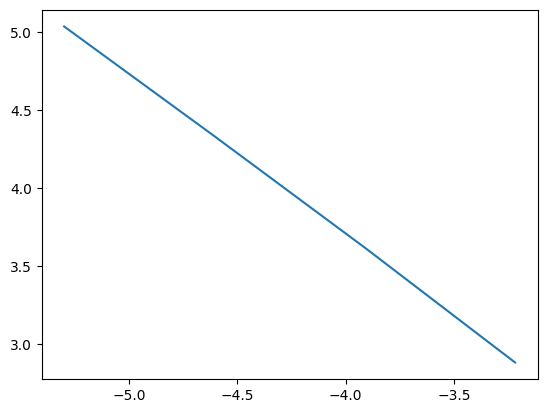

In [6]:
# The first derivative is -2x * e ^ _x^2. At -0.5, the value is e to the - 1/4. 
import numpy as np
import matplotlib.pyplot as plt

x = -0.5
delta_x = [0.04, 0.02, 0.01, 0.005]

def f(x):
    return np.exp(-x**2)

back_diff: np.ndarray = np.zeros(4)
for i, dx in enumerate(delta_x):
    back_diff[i] = f(x) - f(x - dx) / dx

fig, ax = plt.subplots()
ax.plot(np.log(delta_x), np.log(np.abs(back_diff)))

# It is first order accurate because there is one function in the given equation for order accurate.
# Centered difference approximation is difference because it includes two functions.

In [7]:
show('Exercise 4')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
### 1.4. Higher derivatives

We now seek a finite difference approximation for the second derivative $F''(x)$. Consider, for instance, the forward difference approximation $D_1(x)$ for $F'(x)$. We have

$$
F'(x) \approx D_1(x) = \frac{F(x + \Delta x) - F(x)}{\Delta x}.
$$

Taking the derivative on both sides allows us to obtain an approximation for $F''(x)$:

$$
F''(x) \approx \frac{F'(x + \Delta x) - F'(x)}{\Delta x}.
\qquad \color{red}{(\ast)}
$$

Now, let us use $D_1(x)$ again to approximate $F'(x + \Delta x)$ and $F'(x)$, using the same step size:

$$
F''(x) \approx \frac{\frac{F(x + 2\Delta x) - F(x + \Delta x)}{\Delta x} - \frac{F(x + \Delta x) - F(x)}{\Delta x}}{\Delta x}
= \frac{F(x + 2\Delta x) - 2F(x + \Delta x) + F(x)}{\Delta x^2}
:= D^{(2)}_1(x).
$$

This final expression gives us a forward difference approximation of the second derivative $F''(x)$.

---

To investigate its **accuracy**, we use the Taylor expansions of $F(x + 2\Delta x)$ and $F(x + \Delta x)$ about $F(x)$:

\begin{align}
F \left( x + \Delta x \right) &= F \left( x \right) + \Delta x F' \left( x \right) + \frac{\Delta x^2}{2} F'' \left( x \right) + \frac{\Delta x^3}{6} F'''\left(x\right) + \dots \\
F \left( x + 2\Delta x \right) &= F \left( x \right) + (2\Delta x) F' \left( x \right) + \frac{(2\Delta x)^2}{2} F'' \left( x \right) + \frac{(2\Delta x)^3}{6} F'''\left(x\right) + \dots
\end{align}

Substituting these into $D^{(2)}_1(x)$ to calculate the error, we obtain

$$
D^{(2)}_1(x) - F''(x)
= \Delta x F'''(x) + \frac{7\Delta x^2}{12} F''''(x) + \dots
= O(\Delta x),
$$

therefore this approximation is first order accurate. (The detailed derivation will be shown in a video this week.)

---
🚩 **Exercise 5**

Instead of using $D_1(x)$ again to approximate $F'(x + \Delta x)$ and $F'(x)$ in $\color{red}{(\ast)}$, we can use the **backward** difference approximation $D_{-1}(x)$, to obtain a *centred* difference approximation $D^{(2)}_C(x)$ to the *second* derivative $F''(x)$.

Derive the expression for $D^{(2)}_C(x)$, and using the same procedure as above, show (analytically) that it is second order accurate.

I have no idea why anyone would even care to do this. It is second order accurate because there is a 2 up in that position.

tarting from $$ F''(x) \approx \frac{F'(x + \Delta x) - F'(x)}{\Delta x}, $$

we now use $D_{-1}(x)$ to approximate $F'(x + \Delta x)$ and $F'(x)$, using the same step size:

$$ F''(x) \approx \frac{\frac{F(x + \Delta x) - F(x + \Delta x - \Delta x)}{\Delta x} - \frac{F(x) - F(x - \Delta x)}{\Delta x}}{\Delta x} = \frac{F(x + \Delta x) - 2F(x) + F(x - \Delta x)}{\Delta x^2} := D^{(2)}_C(x). $$

This final expression gives us a centred difference approximation of the second derivative $F''(x)$. To investigate its accuracy, we use the Taylor expansions of $F(x + \Delta x)$ and $F(x - \Delta x)$ about $F(x)$ (see solution to Exercise 2). Substituting these into $D^{(2)}_C(x)$ to calculate the error, we obtain

$$ D^{(2)}_C(x) - F''(x) = \frac{1}{\Delta x^2} \left( \Delta x^2 F''(x) + O(\Delta x^4) \right) = O(\Delta x^2). $$

The terms in odd powers of $\Delta x$ cancel out, and this approximation is second order accurate.

In [8]:
show('Exercise 5')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
🚩 **Exercise 6**

Consider, again, the function

\begin{equation}
  F \left( x \right) = e^{-x^2}.
\end{equation}

Find the **second** derivative of $F$, analytically (by hand). Evaluate this second derivative at $x = -\tfrac{1}{2}$.

Then, using the **centred** difference approximation $D^{(2)}_C(x)$ to find approximations for $F'' \left( -\tfrac{1}{2} \right)$ for several carefully chosen values of $\Delta x$, perform similar numerical experiments as in Exercise 4 to confirm that the order of accuracy of $D^{(2)}_C(x)$ is indeed 2.

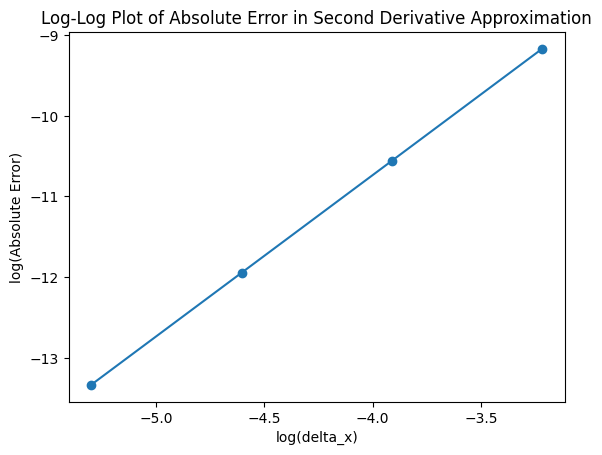

In [9]:
# The second derivative is -2 * e^-x^2 + 4x^2 * e^ -x^2. At -0.5, this is 2 * e^-0.25. I think.
import numpy as np
import matplotlib.pyplot as plt

x = -0.5
delta_x = [0.04, 0.02, 0.01, 0.005]

def f(x):
    return np.exp(-x**2)


def second_derivative_exact(x):
    return -2 * np.exp(-x**2) + 4 * x**2 * np.exp(-x**2)

# Calculate exact value of the second derivative at x = -0.5
exact_value = second_derivative_exact(x)


centered_diff: np.ndarray = np.zeros(4)
for i, dx in enumerate(delta_x):
    centered_diff[i] = (f(x - dx) - 2 * f(x) + f(x + dx)) / dx ** 2

# Calculate absolute error
absolute_error = np.abs(centered_diff - exact_value)

# Plotting
fig, ax = plt.subplots()
ax.plot(np.log(delta_x), np.log(absolute_error), marker='o', linestyle='-')
ax.set_xlabel('log(delta_x)')
ax.set_ylabel('log(Absolute Error)')
ax.set_title('Log-Log Plot of Absolute Error in Second Derivative Approximation')

plt.show()

In [10]:
show('Exercise 6')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
## 2. Computing solutions of ODEs

Finite difference approximations of derivatives can be used to compute approximate solutions of differential equations -- this is in fact a widely used method in many applications in mathematical modelling.

In this course, we limit ourselves to exploring a few examples, to better understand how numerical calculus can be used to solve interesting problems. This is explored in a bit more detail in the Y3 course "Honours Differential Equations"; if numerical methods to solve differential equations is something you find particularly interesting (I sure do!), you should also look into the optional courses "Numerical ODEs" (Y3) and "Numerical PDEs" (Y4).

---

Consider the first order ordinary differential equation (ODE)

\begin{equation}\label{eqn:ode}
  \frac{\mathrm{d} \Psi}{\mathrm{d} t} = -\gamma \Psi \quad \textrm{ for } t > 0,
\end{equation}

where $\gamma$ is a real and non-negative constant, and subject to an initial condition $\Psi \left( t = 0 \right) = \Psi_0$. The ODE together with this initial condition form an *initial value problem* (IVP). The exact solution is

\begin{equation}
  \Psi \left( t \right) = \Psi_0 e^{-\gamma t},
\end{equation}

as can, for example, be verified via direct substitution and checking that the initial condition is satisfied.

---

Of course, for this particular IVP, the analytical solution is straightforward to compute -- we don't really need a numerical method! This example is just to demonstrate the general process and principles used to solve differential equations numerically -- for many real-life problems with more complex models, numerical methods are often the only way to obtain a useful solution.

---

Consider the replacement of the derivative with a discrete approximation, for example via

\begin{align}
  \psi_0 & = \Psi_0, \\
  \frac{\psi_{n + 1} - \psi_{n}}{\Delta t} & = -\gamma \psi_n \quad \textrm{ for } n = 0, 1, 2, \ldots, \qquad \color{blue}{(\ast)}
\end{align}

with $\Delta t > 0$. Here $\psi_n$ is a function over $\mathcal{N}$, a *discrete approximation* for $\Psi$ at $t = n \Delta t$, in other words we have $\psi_n \approx \Psi(n \Delta t)$. We also used a *forward difference* approximation of the derivative on the LHS:

$$
\left. \frac{\mathrm{d} \Psi}{\mathrm{d} t} \right|_{t = n \Delta t}
\approx \frac{\Psi(t + \Delta t) - \Psi(t)}{\Delta t}
\approx \frac{\psi_{n + 1} - \psi_{n}}{\Delta t}.
$$

$\color{blue}{(\ast)}$ is known as a "forward Euler" discretisation of the original differential equation. Such discretisations are often generally referred to as *finite difference schemes*.

- Since the initial value $\psi_0  = \Psi_0$ is known (we impose it), for $n = 0$, the only unknown in $\color{blue}{(\ast)}$ is $\psi_1$, and we can re-arrange the expression to express the "new" value $\psi_{1}$ in terms of the "old" value $\psi_0$.
- With this, we can compute $\psi_1$.
- Now, at $n=1$, the only unknown in $\color{blue}{(\ast)}$ is $\psi_2$; we can compute it following the same process we used for $\psi_1$.
- We can continue computing any "new" value $\psi_{n+1}$ **iteratively**, using the previously computed value $\psi_n$. Rearranging $\color{blue}{(\ast)}$ accordingly gives

\begin{equation}
  \psi_{n + 1} = \left( 1 - \gamma \Delta t \right) \psi_n \quad \textrm{ for } n = 0, 1, 2, \ldots
\end{equation}

---
🚩 **Exercise 7**

Compute and plot the numerical approximation for the solution to the initial value problem, obtained by using the forward Euler scheme with $\psi_0 = 1$, with $100$ steps of size $\Delta t = 0.1$, and with $\gamma = 1$.

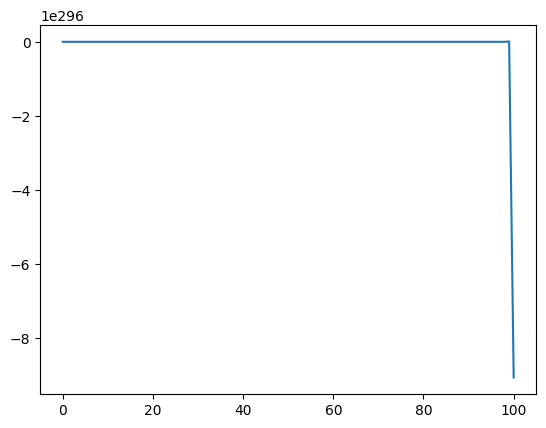

In [11]:
ode = [1]

for n in range(99):
    ode.append((1 - 1000) * ode[n])

n_vals = np.linspace(0, 100, 100)

fig, ax = plt.subplots()
ax.plot(n_vals, ode)

In [12]:
show('Exercise 7')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
🚩 **Exercise 8**

Experiment with different values of $\gamma$ and $\Delta t$. What happens if $\gamma \Delta t$ becomes too large?

In [13]:
# When y and t increase, the curve flattens to become retangular if they = x. 
# If it becomes negative, the plot goes crazy and looks like sin and cos. 
# If you go even more negative, it will become a rectangular on the other side.

In [14]:
show('Exercise 8')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
🚩 **Exercise 9** (exploration)

We used a forward difference approximation for the derivative; can you find other discretisations for the problem?

In [15]:
# We could maybe use backward or central. 

In [16]:
show('Exercise 9')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…